In [124]:
# Supervised classification problem

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [132]:
data = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

### Pipeline of ML model


1. import data (Data injection)
2. EDA
3. Preprocessing
4. Model -->> Mathematical Equation  (SVR/SVC)
5. Evaluation -->> Performance Matrics/Confusion Matirix

In [133]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [134]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [135]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observation :
- As output type is of more than two types for Logistic Regression -->> Multinomial 

In [136]:
# Columns of the dataset

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation :
- There is no null value
- All the input features are of 'Float' type and output label is of 'int' type

In [138]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### EDA

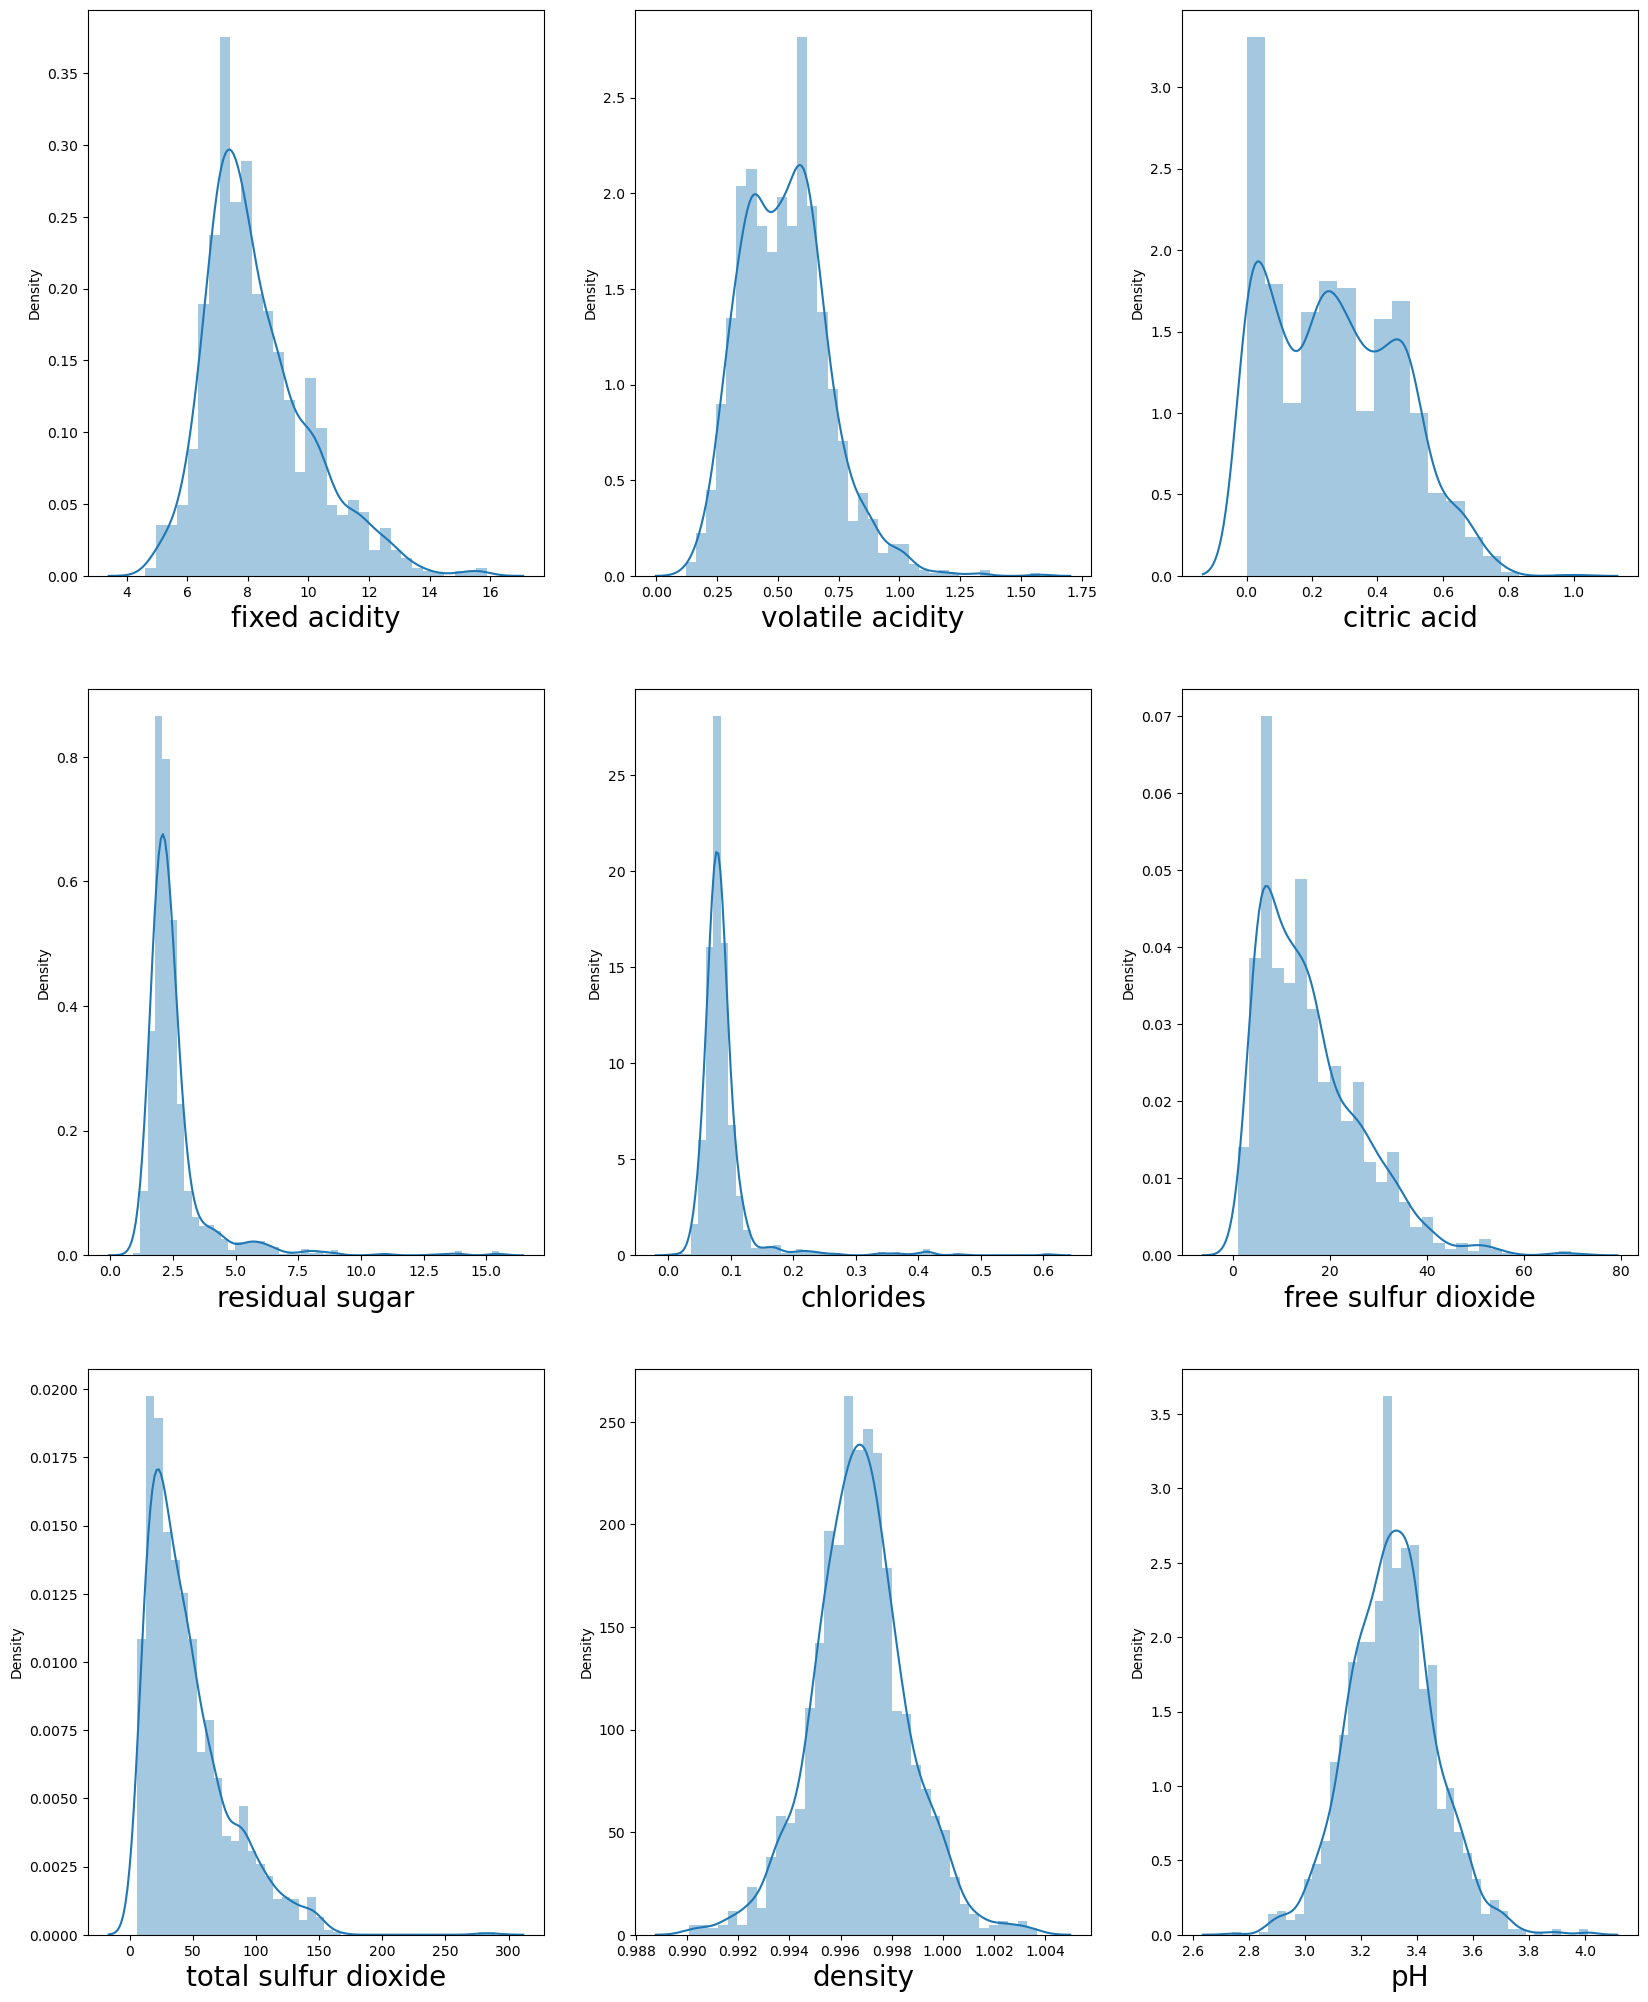

In [139]:
# To check the distribution 

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for columns in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns, fontsize=20)
    plotnumber+=1
plt.show()

### To check the correlation

<AxesSubplot: >

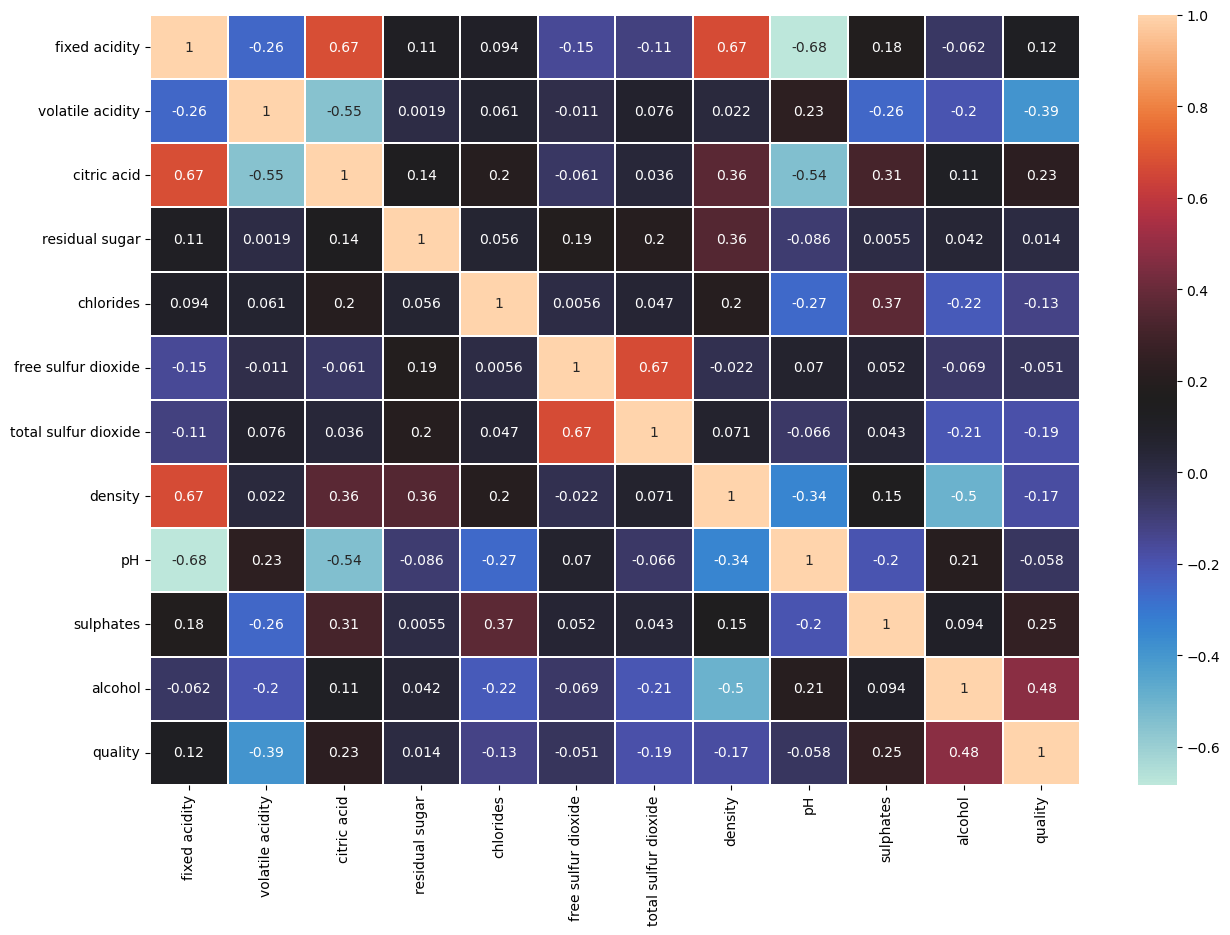

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='icefire', linewidths=0.2)

Observation :
- Red=sidual Sugar, Chlorides, Total sulfer dioxide, free sulfer dioxide are right skewed.
- Density, Ph,  are approx normally distributed

In [141]:
# Considering the input features 

X = data.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [142]:
# Output label

y = data['quality']

### Train test split

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [147]:
scaler.fit(X_train)   # calculate Mean and std

StandardScaler()

In [148]:
print(scaler.mean_)

[ 8.30345472  0.53246499  0.26933707  2.54691877  0.08772736 15.91223156
 46.76330532  0.99677933  3.31453782  0.65881419 10.41521942]


In [149]:
scaler.transform(X_train)

array([[ 2.40069523, -1.03103722,  1.12742595, ..., -1.26096312,
         0.52726134, -0.01431863],
       [-0.93967131,  1.22920403, -1.32502245, ...,  1.52622836,
        -0.28225704,  2.24363201],
       [-0.99827424,  0.55113165, -1.37611513, ..., -0.74241587,
        -1.20742091, -0.86105011],
       ...,
       [-0.6466567 ,  0.49462562, -1.06955908, ...,  1.26695473,
        -0.68701624, -0.86105011],
       [-0.23643625, -1.87862768,  0.4121285 , ...,  0.03540501,
         0.81637505,  1.39690052],
       [-1.46709761, -1.3700734 , -0.04770558, ...,  0.48913386,
        -0.68701624,  2.90220094]])

In [150]:
X_train_tf = scaler.fit_transform(X_train)
X_train_tf

array([[ 2.40069523, -1.03103722,  1.12742595, ..., -1.26096312,
         0.52726134, -0.01431863],
       [-0.93967131,  1.22920403, -1.32502245, ...,  1.52622836,
        -0.28225704,  2.24363201],
       [-0.99827424,  0.55113165, -1.37611513, ..., -0.74241587,
        -1.20742091, -0.86105011],
       ...,
       [-0.6466567 ,  0.49462562, -1.06955908, ...,  1.26695473,
        -0.68701624, -0.86105011],
       [-0.23643625, -1.87862768,  0.4121285 , ...,  0.03540501,
         0.81637505,  1.39690052],
       [-1.46709761, -1.3700734 , -0.04770558, ...,  0.48913386,
        -0.68701624,  2.90220094]])

In [151]:
# SVC model

from sklearn.svm import SVC
model = SVC()

In [152]:
model.fit(X_train_tf, y_train)

SVC()

In [153]:
model.score(X_train_tf, y_train)

0.6778711484593838

Observation :
- Training accuracy is 67%

In [154]:
X_test_tf = scaler.transform(X_test)

In [155]:
y_predict = model.predict(X_test_tf)

In [156]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
813     4
377     7
898     7
126     5
819     5
Name: quality, Length: 528, dtype: int64

In [157]:
from sklearn.metrics import accuracy_score

#### Accuracy of SVC model

In [158]:
accuracy_score(y_test, y_predict)

0.5984848484848485

Observation :
- Test accuracy of SVC model is 59%
- So it is a over fitted model

In [159]:
### To increase the accuracy we can check with Logistic Regression model

In [160]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [161]:
model2.fit(X_train_tf, y_train)

LogisticRegression()

In [162]:
model.score(X_train_tf, y_train)

0.6778711484593838

In [163]:
y_predict2 = model2.predict(X_test_tf)

#### Accuracy of the Logistic Regression model

In [164]:
accuracy_score(y_test, y_predict2)

0.571969696969697

Observation :
Accuracy fron Logistic regression is 57%   

Single value prediction

In [167]:
X_test_tf[0]

array([-0.3536421 ,  0.15558944, -0.96737373, -0.03334372,  0.55556956,
       -0.18596079, -0.02314512,  0.1740298 , -0.48314224,  0.00685666,
       -0.76696884])

In [168]:
model2.predict([[-0.3536421 ,  0.15558944, -0.96737373, -0.03334372,  0.55556956,
       -0.18596079, -0.02314512,  0.1740298 , -0.48314224,  0.00685666,
       -0.76696884]])

array([5])

## GridSearchCV 

In [169]:
from sklearn.model_selection import GridSearchCV


In [171]:
### Definning the params

param_grid = {'C':[1,10,100],
             'gamma' : [1,0.1],
             'kernel' : ['linear', 'rbf']}

In [172]:
# GridSearchCV(estimator, paramgrid, other parameters)

model3 = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [174]:
model3.fit(X_train_tf, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.549 total time=   0.1s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.584 total time=   0.1s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.565 total time=   0.1s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.598 total time=   0.1s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.664 total time=   0.1s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.619 total time=   0.1s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.565 total time=   0.1s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.621 total time=   0.1s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.673 total time=   0.1s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.682 total time=   0.1s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.549 total time=   0.1s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [175]:
GridSearchCV(estimator=SVC(), param_grid={'C': [1,10,100], 'gamma' : [1,0.1], 'kernel':['linear', 'rbf']})

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1],
                         'kernel': ['linear', 'rbf']})

In [176]:
model3.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [177]:
model3.best_estimator_

SVC(C=10, gamma=1)

In [178]:
model3.score(X_train_tf, y_train)

0.9990662931839402

In [179]:
y_predict3 = model3.predict(X_test_tf)

In [180]:
accuracy_score(y_test, y_predict3)

0.6287878787878788